In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from joblib import dump, load
import statistics as st

In [4]:
y   = load('../../March2021/Observation_models/ObsY.joblib') 
CNN = load('../../March2021/Observation_models/CNNY.joblib') 
LR  = load('../../March2021/Observation_models/LRY.joblib')
SVR  = load('../../March2021/Observation_models/SVRY.joblib')

ACCESS_CM2_CNN = load('ACCESS-CM2-CNN-Y1.joblib')

IITMESM_CNN = load('IITM-ESM-CNN-Y1.joblib')

IPSL_CM6A_LR_CNN = load('IPSL-CM6A-LR-CNN-Y1.joblib')

MPI_ESM1_2_LR_CNN = load('MPI-ESM1-2-LR-CNN-Y1.joblib')
MPI_ESM1_2_HR_CNN = load('MPI-ESM1-2-HR-CNN-Y.joblib')


EC_Earth3_CNN = load('EC-Earth3-CNN-Y1.joblib')


In [5]:
y.values=y.where(y>=0.46,0)
CNN.values=CNN.where(CNN>=0.46,0)
LR.values=LR.where(LR>=0.46,0)
SVR.values=SVR.where(SVR>=0.46,0)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN>=0.46,0)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN>=0.46,0)


IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN>=0.46,0)


MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN>=0.46,0)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN>=0.46,0)

y

<xarray.DataArray 'fogdata' (time: 2418)>
array([0., 0., 0., ..., 0., 0., 0.])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2018-12-31

In [6]:
y.values=y.where(y==0.0,1)
CNN.values=CNN.where(CNN==0.0,1)
LR.values=LR.where(LR==0.0,1)
SVR.values=SVR.where(SVR==0.0,1)

ACCESS_CM2_CNN.values=ACCESS_CM2_CNN.where(ACCESS_CM2_CNN==0.0,1)

IITMESM_CNN.values=IITMESM_CNN.where(IITMESM_CNN==0.0,1)

IPSL_CM6A_LR_CNN.values=IPSL_CM6A_LR_CNN.where(IPSL_CM6A_LR_CNN==0.0,1)

MPI_ESM1_2_LR_CNN.values=MPI_ESM1_2_LR_CNN.where(MPI_ESM1_2_LR_CNN==0.0,1)

EC_Earth3_CNN.values=EC_Earth3_CNN.where(EC_Earth3_CNN==0.0,1)



In [7]:
EC_Earth3_CNN

<xarray.DataArray 'yLR' (time: 2170)>
array([0., 0., 0., ..., 0., 1., 1.], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2014-12-31T12:00:00

In [8]:
def getSeasonalCycle( dArray ):
   #"This function gives TS of categories of each type for each season e.g. if year
   #  is 1981 then it will contain values between 1dec1980 to 31jan1981"
    fg=dArray.groupby('time.dayofyear').mean()
    
    
    
    return fg

In [9]:
ts=getSeasonalCycle(y)
#print(ts)
ts1=ts.roll(dayofyear=32)
#print(ts1)
#print(ts1.dayofyear)
#print(ts.dayofyear)
ts1
ts1[(ts1.dayofyear<366) | (ts1.dayofyear>366)]

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(


<xarray.DataArray 'fogdata' (dayofyear: 62)>
array([0.        , 0.05128205, 0.02564103, 0.05128205, 0.07692308,
       0.07692308, 0.07692308, 0.07692308, 0.12820513, 0.12820513,
       0.1025641 , 0.17948718, 0.15384615, 0.12820513, 0.15384615,
       0.15384615, 0.23076923, 0.25641026, 0.25641026, 0.23076923,
       0.25641026, 0.17948718, 0.28205128, 0.38461538, 0.33333333,
       0.30769231, 0.35897436, 0.43589744, 0.38461538, 0.43589744,
       0.46153846, 0.41025641, 0.43589744, 0.43589744, 0.48717949,
       0.35897436, 0.41025641, 0.53846154, 0.41025641, 0.46153846,
       0.33333333, 0.23076923, 0.35897436, 0.28205128, 0.35897436,
       0.23076923, 0.15384615, 0.25641026, 0.25641026, 0.30769231,
       0.23076923, 0.20512821, 0.17948718, 0.17948718, 0.17948718,
       0.23076923, 0.15384615, 0.15384615, 0.15384615, 0.1025641 ,
       0.1025641 , 0.05128205])
Coordinates:
  * dayofyear  (dayofyear) int64 335 336 337 338 339 340 ... 26 27 28 29 30 31

In [10]:
x=(32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31)

/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/core/dataarray.py:3127: FutureWarning: roll_coords will be set to False in the future. Explicitly set roll_coords to silence warning.
  ds = self._to_temp_dataset().roll(
/home/cccr/diptih/anaconda3/lib/python3.8/site-packages/xarray/c

0.11173942


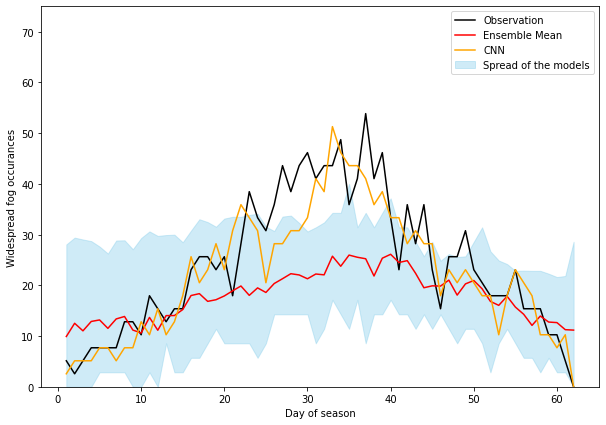

OKK
9.91377
12.519507
11.029365
12.880759
13.178316
11.52009
13.376768
13.86038
11.184887
10.601467
13.67573
11.146665
14.032414
14.04482
15.2232275
17.989428
18.36095
16.839115
17.162104
17.906849
18.918198
19.868555
18.024395
19.494291
18.595093
20.354486
21.305443
22.290546
22.04738
21.292042
22.229382
22.067148
25.742098
23.760855
25.960562
25.532732
25.239632
21.838211
25.349072
26.116995
24.498991
24.865215
22.371304
19.52241
19.899721
19.853022
21.02652
18.072115
20.287525
20.947426
19.317217
16.830782
16.05351
17.841682
15.71611
14.292701
12.103495
13.945988
12.76335
12.653245
11.25876
11.173942


In [12]:
fig = plt.figure(figsize=(10,7))
#fig = plt.figure(figsize=(10,5))
x=np.arange(1,63)
#fMean=list()
fCC=list()
OTs1=getSeasonalCycle(y)
OTs2=OTs1.roll(dayofyear=31)
OTs=OTs2[(OTs2.dayofyear<366) | (OTs2.dayofyear>366)]
OTs

CNNTs1=getSeasonalCycle(CNN)
CNNTs2=CNNTs1.roll(dayofyear=31)
CNNTs=CNNTs2[(CNNTs2.dayofyear<366) | (CNNTs2.dayofyear>366)]
CNNTs

MTs=[]

fList=(ACCESS_CM2_CNN,IITMESM_CNN,
       IPSL_CM6A_LR_CNN, MPI_ESM1_2_LR_CNN, MPI_ESM1_2_HR_CNN, 
       EC_Earth3_CNN)

for fL in fList:
    ts1=getSeasonalCycle(fL)
    ts2=ts1.roll(dayofyear=31)
    ts=ts2[(ts2.dayofyear<366) | (ts2.dayofyear>366)]
    MTs.append(ts)
    
    
MS=np.array(MTs)
print(np.mean(MS[:,61]))

meanMS=np.mean(MS, axis=0)
minMS=np.amin(MS,axis=0)
maxMS=np.amax(MS,axis=0)

x=np.arange(1,63)


plt.fill_between(x, maxMS*100.0,minMS*100.0,
                 color="skyblue", alpha=0.4,label='Spread of the models')
#plt.fill_between(x, minMS,
#                 color="white", alpha=0.4)
plt.plot(x,OTs*100.0,label='Observation', color='black')
plt.plot(x,meanMS*100.0,label='Ensemble Mean', color='red')
plt.plot(x,CNNTs*100.0,label='CNN', color='orange')
plt.ylim([0.00, 75])
    
plt.xlabel('Day of season')
plt.ylabel('Widespread fog occurances')     
plt.legend()

plt.savefig('Best5_Historical_WFD_SC_ModelsSpread.eps')
plt.show()

print('OKK')
print('\n'.join(map(str, meanMS*100))) 

ensTs=OTs.copy()
ensTs.values=meanMS
#dump(ensTs,'../../April2021/Future_projection_plots/WFD_historical_ensembleMean_Best5.joblib')
#ensTs
